# Collect the data from 2009 to 2018.


 The method of Combination 
 - If the datasets do not appear in all these years, then I have deleted them.
 - If the columns of the same dataset do not appear in all these years, then I have deleted them.(as in function changed_columns)
 - In the Diet file, the dataset is 600MB and most of them is None, so I add another method(this method only used in this file.) to deal with this, tried to take down the file size. Shown in the below.

# Demo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import missingno as msno


def read_data(basename):
    """
    Read all nhanes data files for a category. Concatenate them all together and return resultant dataframe. 
       
    Parameters:
        type_dict: dictionary
            dictionary used for dtype= in pd.read_csv
        basename: string
            base filename for NHANES data category
        
        
    Returns:
        df: dataframe
            dataframe built from NHANES datafiles. 
    """
    
    df_file_list = glob.iglob('data/**'+ basename+'*.XPT',recursive = True)
    try:
        df = pd.concat((pd.read_sas(f) for f in df_file_list), ignore_index=True)
        df['SEQN'] = df['SEQN'].astype('int')
    except FileNotFoundError:
        df = pd.DataFrame()
                              
    return(df)

def changed_columns(basename):
    """
    Return list of columns that do not span all 10 years of interest. If a file is missing, 
    do not report difference for that interval.
    
    Parameters:
        basename: string
            Base of NHANES filename pattern.
            
    Returns:
        list: list
            list of all columns dropped or added between NHANES files. Columns appear in list only once. 
       """
    
    df_file_list = glob.iglob('data/**'+ basename+'*.XPT',recursive = True)
    col_name = []
    for f in df_file_list:
        col_name.append(pd.read_sas(f).columns.tolist())
        
    n7_columns = col_name[0]
    n9_columns = col_name[1]
    n11_columns = col_name[2]
    n13_columns = col_name[3]
    n15_columns = col_name[4]
    
    if n7_columns and n9_columns:
        diff_7_9 = (set(n7_columns) | set(n9_columns)) - (set(n7_columns) & set(n9_columns))
    else:
        diff_7_9 = []
    if n9_columns and n11_columns:
        diff_9_11 = (set(n9_columns) | set(n11_columns)) - (set(n9_columns) & set(n11_columns))
    else:
        diff_9_11 = []
    if n11_columns and n13_columns:
        diff_11_13 = (set(n11_columns) | set(n13_columns)) - (set(n11_columns) & set(n13_columns))
    else:
        diff_11_13 = []
    if n13_columns and n15_columns:
        diff_13_15 = (set(n13_columns) | set(n15_columns)) - (set(n13_columns) & set(n15_columns))
    else:
        diff_13_15 = []

    # Create union of all four sets of column differences to eliminate duplicates, convert to list, return list. 
    return(list(set(diff_7_9) | set(diff_9_11) | set(diff_11_13) | set(diff_13_15)))

def get_data(basename):
    
    df = read_data(basename)
    
    # get the columns that appear in 10 years
    Name_change = changed_columns(basename)
    df = df.drop(Name_change,axis=1)
#     print(df.head(3))
#     print(df.info())
   
    return df

## Read Demo

In [5]:
# read files
basename = '/DEMO_'
demo_all = get_data(basename)

In [84]:
demo_all.to_csv('data/demo_all.csv', na_rep='nan', index=False)

<AxesSubplot:>

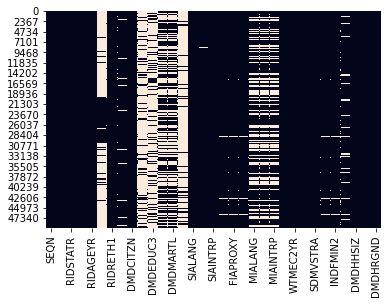

In [17]:
sns.heatmap(demo_all.isnull(), cbar=False)

In [19]:
demo_all.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDEXMON,DMDCITZN,DMDYRSUS,...,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,DMDHHSIZ,DMDFMSIZ,DMDHRGND
0,62161,7.0,2.0,1.0,22.0,NaN,3.0,2.0,1.0,NaN,...,102641.406474,104236.582554,1.0,91.0,14.0,14.0,3.15,5.0,5.0,2.0
1,62162,7.0,2.0,2.0,3.0,NaN,1.0,1.0,1.0,NaN,...,15457.736897,16116.354010,3.0,92.0,4.0,4.0,0.60,6.0,6.0,2.0
2,62163,7.0,2.0,1.0,14.0,NaN,5.0,2.0,1.0,NaN,...,7397.684828,7869.485117,3.0,90.0,15.0,15.0,4.07,5.0,5.0,1.0
3,62164,7.0,2.0,2.0,44.0,NaN,3.0,1.0,1.0,NaN,...,127351.373299,127965.226204,1.0,94.0,8.0,8.0,1.67,5.0,5.0,1.0
4,62165,7.0,2.0,2.0,14.0,NaN,4.0,2.0,1.0,NaN,...,12209.744980,13384.042162,2.0,90.0,4.0,4.0,0.57,5.0,5.0,2.0


In [18]:
demo_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49693 entries, 0 to 49692
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      49693 non-null  int64  
 1   SDDSRVYR  49693 non-null  float64
 2   RIDSTATR  49693 non-null  float64
 3   RIAGENDR  49693 non-null  float64
 4   RIDAGEYR  49693 non-null  float64
 5   RIDAGEMN  12703 non-null  float64
 6   RIDRETH1  49693 non-null  float64
 7   RIDEXMON  47652 non-null  float64
 8   DMDCITZN  49672 non-null  float64
 9   DMDYRSUS  10147 non-null  float64
 10  DMDEDUC3  12950 non-null  float64
 11  DMDEDUC2  28835 non-null  float64
 12  DMDMARTL  28835 non-null  float64
 13  RIDEXPRG  6320 non-null   float64
 14  SIALANG   49693 non-null  float64
 15  SIAPROXY  49682 non-null  float64
 16  SIAINTRP  49693 non-null  float64
 17  FIALANG   48596 non-null  float64
 18  FIAPROXY  48596 non-null  float64
 19  FIAINTRP  48596 non-null  float64
 20  MIALANG   35044 non-null  fl

## Read Diet file

In [6]:
DR1TOT = get_data('/DR1TOT_')
diet_all = DR1TOT

<AxesSubplot:>

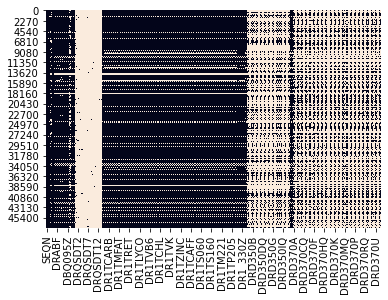

In [7]:
sns.heatmap(diet_all.isnull(), cbar=False)

In [8]:
diet_all.shape

(47652, 163)

In [9]:
diet_all_null_counts = diet_all.isnull().sum()
diet_all_null_counts.describe()

count      163.000000
mean     20008.306748
std      17539.485592
min          0.000000
25%       5298.000000
50%       5298.000000
75%      40216.000000
max      47645.000000
dtype: float64

In [10]:
diet_all_null_counts = diet_all.isnull().sum(axis=1)
diet_all_null_counts.describe()

count    47652.000000
mean        68.441073
std         34.292417
min         26.000000
25%         42.000000
50%         55.000000
75%         77.000000
max        161.000000
dtype: float64

In [11]:
diet_all = diet_all[diet_all.isnull().sum(axis=1) < 160]


In [12]:
diet_all.shape

(43612, 163)

Delete some columns having over 40% Nan.

In [14]:
for col in diet_all.columns:
    col_sum = diet_all[col].isnull().sum()
    if col_sum / diet_all.shape[0] >= 0.4:
        diet_all = diet_all.drop(col,axis=1)

In [144]:
diet_all.to_csv('data/diet_all.csv', na_rep='nan', index=False)

## read and combine Examnation data 

In [86]:
BMX_ = get_data('/BMX_')

BPX_ = get_data('/BPX_')

exam_all = pd.merge(BMX_, BPX_, on='SEQN')

exam_all.to_csv('data/exam_all.csv', na_rep='nan', index=False)

## read and combine Lab data 

In [87]:
ALB_CR_ = get_data('/ALB_CR')

BIOPRO_ = get_data('/BIOPRO_')

CBC_ = get_data('/CBC_')

FASTQX_ = get_data('/FASTQX_')

FOLATE_ = get_data('/FOLATE_')

GHB_ = get_data('/GHB_')

GLU_ = get_data('/GLU_')

HDL_ = get_data('/HDL_')

HEPA_ = get_data('/HEPA_')

HEPB_S_ = get_data('/HEPB_S_')

HEPBD_ = get_data('/HEPBD_')

HEPC_ = get_data('/HEPC_')

HIV_ = get_data('/HIV_')

PBCD_ = get_data('/PBCD_')

TCHOL_ = get_data('/TCHOL_')

TRIGLY_ = get_data('/TRIGLY_')

UAS_ = get_data('/UAS_')

UCPREG_ = get_data('/UCPREG_')

UHG_ = get_data('/UHG_')

UIO_ = get_data('/UIO_')

VOCWB_ = get_data('/VOCWB_')

dfs = [ALB_CR_,
BIOPRO_,
CBC_,
FASTQX_,
FOLATE_,
GHB_,
GLU_,
HDL_,
HEPA_,
HEPB_S_,
HEPBD_,
HEPC_,
HIV_,
PBCD_,
TCHOL_,
TRIGLY_,
UAS_,
UCPREG_,
UHG_,
UIO_,
VOCWB_]

labs_all = pd.merge(dfs[0], dfs[1], on='SEQN', how='outer')

for df in dfs[2:]:
    labs_all = pd.merge(labs_all, df, on='SEQN', how='outer')

labs_all.to_csv('data/labs_all.csv', na_rep='nan', index=False)

## read and combine questionnaire data 

In [56]:
ACQ_ = get_data('/ACQ_')

ALQ_ = get_data('/ALQ_')

BPQ_ = get_data('/BPQ_')

CDQ_ = get_data('/CDQ_')

DBQ_ = get_data('/DBQ_')

DIQ_ = get_data('/DIQ_')

DPQ_ = get_data('/DPQ_')

DUQ_ = get_data('/DUQ_')

ECQ_ = get_data('/ECQ_')

FSQ_ = get_data('/FSQ_')

HOQ_ = get_data('/HOQ_')

HSQ_ = get_data('/HSQ_')

HUQ_ = get_data('/HUQ_')

IMQ_ = get_data('/IMQ_')

INQ_ = get_data('/INQ_')

KIQ_U_ = get_data('/KIQ_U_')

MCQ_ = get_data('/MCQ_')

OCQ_ = get_data('/OCQ_')

PAQ_ = get_data('/PAQ_')

PUQMEC_ = get_data('/PUQMEC_')

RHQ_ = get_data('/RHQ_')

RXQ_RX_ = get_data('/RXQ_RX_')

SLQ_ = get_data('/SLQ_')

SMQ_ = get_data('/SMQ_')

SMQRTU_ = get_data('/SMQRTU_')

WHQ_ = get_data('/WHQ_')

WHQMEC_ = get_data('/WHQMEC_')

PFQ_ = get_data('/PFQ_')

dfs = [
ACQ_,

ALQ_,

BPQ_ ,

CDQ_ ,

DBQ_ ,
DIQ_ ,

DPQ_ ,

DUQ_ ,

ECQ_ ,

FSQ_ ,

HOQ_,

HSQ_ ,

HUQ_ ,

IMQ_ ,

INQ_ ,

KIQ_U_, 

MCQ_ ,

OCQ_ ,

PAQ_,

PUQMEC_, 

RHQ_ ,
RXQ_RX_, 

SLQ_ ,

SMQ_ ,

SMQRTU_ ,

WHQ_ ,
WHQMEC_,
PFQ_ ]

questionnaire_all = pd.merge(dfs[0], dfs[1], on='SEQN', how='outer')

for df in dfs[2:]:
    questionnaire_all = pd.merge(questionnaire_all, df, on='SEQN', how='outer')

# questionnaire_all.to_csv('data/questionnaire_all.csv', na_rep='nan', index=False)

In [58]:
import numpy as np
def conditions(s):
    if (s['MCQ160B']  == 1.0 ) or (s['MCQ160C'] == 1.0) or (s['MCQ160E'] == 1.0) or (s['MCQ160F'] == 1.0):
        return 1
    elif (s['MCQ160B']  == 2.0 ) and (s['MCQ160C'] == 2.0) and (s['MCQ160E'] == 2.0) and (s['MCQ160F'] == 2.0):
        return 0
    else:
        return np.nan
    
questionnaire_all['Target'] = questionnaire_all.apply(conditions, axis=1)


In [60]:
questionnaire_all = questionnaire_all.loc[questionnaire_all['Target'].isnull()==False,:]

In [62]:
for col in questionnaire_all.columns:
    col_sum = questionnaire_all[col].isnull().sum()
    if col_sum / questionnaire_all.shape[0] >= 0.4:
        questionnaire_all = questionnaire_all.drop(col,axis=1)

Text(33.0, 0.5, 'Counts')

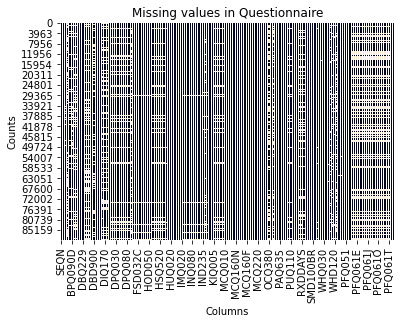

In [63]:
sns.heatmap(questionnaire_all.isnull(), cbar=False)
plt.title('Missing values in Questionnaire')
plt.xlabel('Columns')
plt.ylabel('Counts')

In [67]:
questionnaire_all.to_csv('data/data/questionnaire_all_old.csv', na_rep='nan', index=False)